In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:

import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
TRAIN_DIR = '/content/gdrive/MyDrive/test'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['truck', 'horse', 'ship', 'automobile', 'deer', 'airplane', 'frog', 'bird', 'cat', 'dog']


In [6]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    print(f"Category: {c}")
    CLASS_NUM = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        TRAIN_DATA.append([img_arr, CLASS_NUM])
    print("\n")

Category: truck


100%|██████████| 1000/1000 [00:01<00:00, 563.89it/s]




Category: horse


100%|██████████| 1000/1000 [00:01<00:00, 572.08it/s]




Category: ship


100%|██████████| 1000/1000 [00:01<00:00, 587.90it/s]




Category: automobile


100%|██████████| 1000/1000 [00:01<00:00, 561.46it/s]




Category: deer


100%|██████████| 1000/1000 [00:01<00:00, 562.75it/s]




Category: airplane


100%|██████████| 1000/1000 [00:01<00:00, 662.55it/s]




Category: frog


100%|██████████| 1000/1000 [00:01<00:00, 645.09it/s]




Category: bird


100%|██████████| 1000/1000 [00:01<00:00, 595.68it/s]




Category: cat


100%|██████████| 1000/1000 [00:01<00:00, 580.75it/s]




Category: dog


100%|██████████| 1000/1000 [00:01<00:00, 587.32it/s]

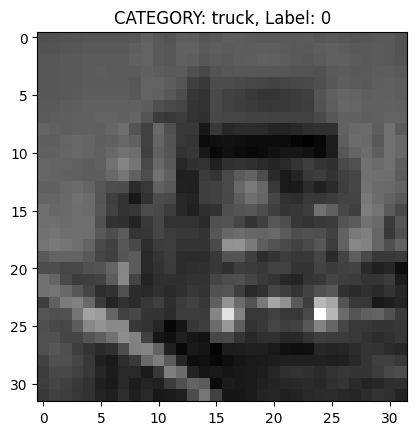

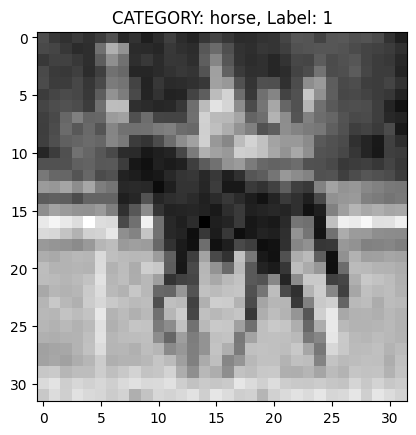

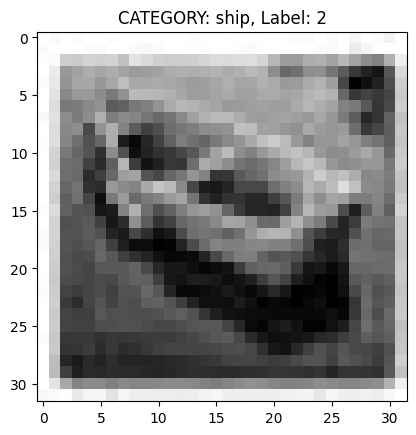

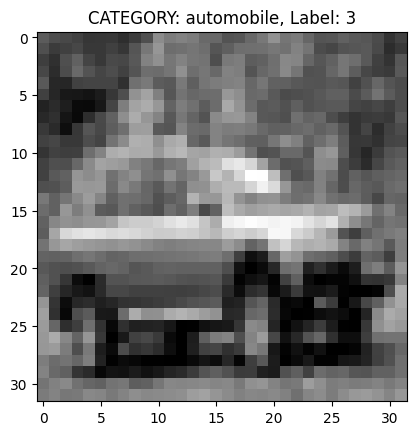

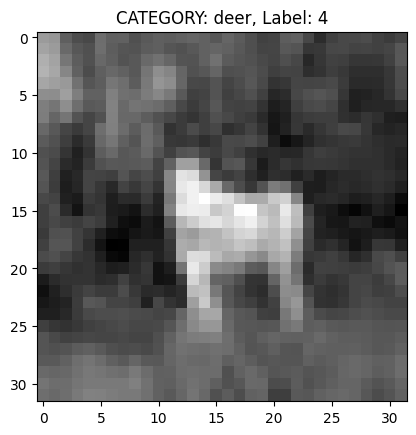

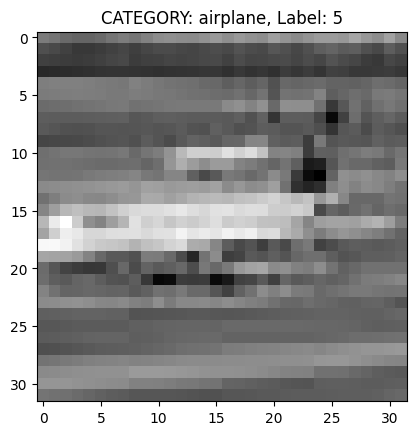

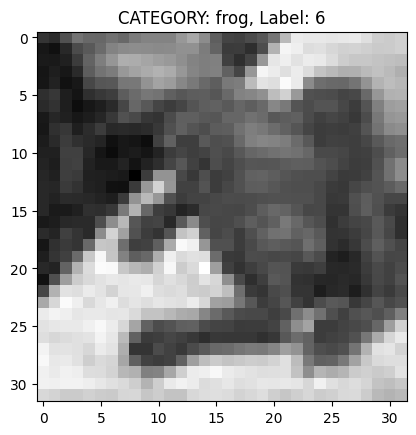

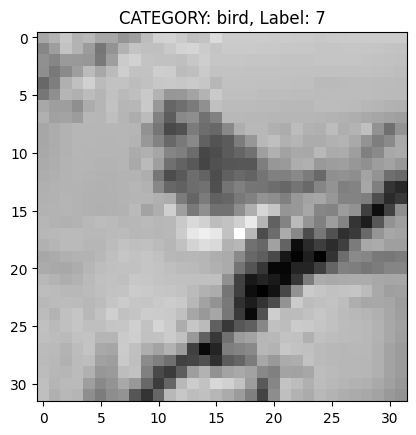

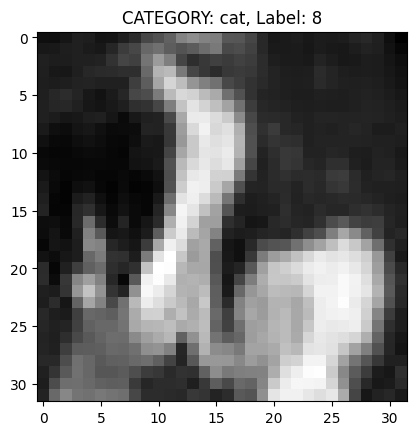

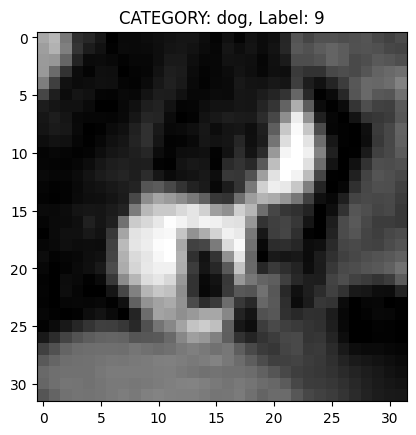

In [7]:
for c in CATEGORIES:
    images_in_CATEGORIES = [item for item in TRAIN_DATA if item[1] == CATEGORIES.index(c)]
    if images_in_CATEGORIES:
        FIRST_IMAGE, label = images_in_CATEGORIES[0]
        plt.imshow(FIRST_IMAGE, cmap='gray')
        plt.title(f"CATEGORY: {c}, Label: {label}")
        plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]
accuracy_manhattan_list = []
accuracy_euclidean_list = []

X = np.array([item[0].flatten() for item in TRAIN_DATA])
y = np.array([item[1] for item in TRAIN_DATA])

for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    manhattan_scores = cross_val_score(knn_manhattan, X, y, cv=5, scoring='accuracy')
    euclidean_scores = cross_val_score(knn_euclidean, X, y, cv=5, scoring='accuracy')

    accuracy_manhattan_list.append(manhattan_scores)
    accuracy_euclidean_list.append(euclidean_scores)


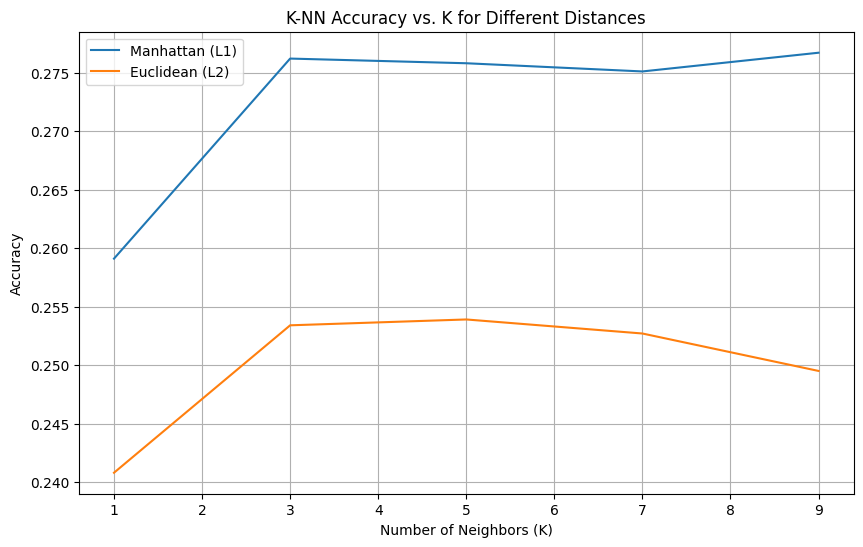

In [9]:
avg_accuracy_manhattan = [sum(fold) / 5 for fold in accuracy_manhattan_list]
avg_accuracy_euclidean = [sum(fold) / 5 for fold in accuracy_euclidean_list]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracy_manhattan, label='Manhattan (L1)')
plt.plot(k_values, avg_accuracy_euclidean, label='Euclidean (L2)')
plt.title('K-NN Accuracy vs. K for Different Distances')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [10]:
import os
import cv2
from tqdm import tqdm

TEST_TRAIN_DIR = '/content/gdrive/MyDrive/test'
TEST_DATA = []
TEST_CATEGORIES = os.listdir(TEST_TRAIN_DIR)

for c in TEST_CATEGORIES:
    path = os.path.join(TEST_TRAIN_DIR, c)

    IMAGE_PATHS = os.listdir(path)

    for img in tqdm(IMAGE_PATHS):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        TEST_DATA.append((img_arr, TEST_CATEGORIES.index(c)))


100%|██████████| 1000/1000 [00:02<00:00, 449.51it/s]


IndexError: ignored

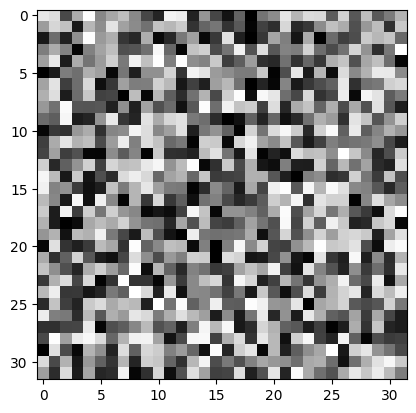

In [31]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define your categories (replace with your actual category names)
CATEGORIES = ["Category1", "Category2", "Category3", ...]

best_k_manhattan = 9
best_k_euclidean = 9

knn_manhattan = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
knn_euclidean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')

knn_manhattan.fit(X, y)
knn_euclidean.fit(X, y)

def display_top_predictions(image_index, classifier, distance_type):
    image = X_test[image_index].reshape(32, 32)
    plt.imshow(image, cmap='gray')
    true_label = y_test[image_index]
    plt.title(f"Test Image - True Label: {CATEGORIES[true_label]}")
    plt.show()

    distances, indices = classifier.kneighbors([X_test[image_index]], n_neighbors=5)
    top_predictions = y[indices[0]]

    print(f"Top 5 Predictions for {distance_type} Distance:")
    for i, label in enumerate(top_predictions):
        prediction = CATEGORIES[label]
        is_correct = "Correct" if label == true_label else "Incorrect"
        print(f"Prediction {i + 1}: {prediction} ({is_correct})")

    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Top 5 Predictions for {distance_type} Distance")
    for i, label in enumerate(top_predictions):
        img = X[label].reshape(32, 32)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction {i + 1}: {CATEGORIES[label]}")

    plt.show()

# Call the function to display top predictions
display_top_predictions(0, knn_manhattan, "Manhattan")
display_top_predictions(0, knn_euclidean, "Euclidean")



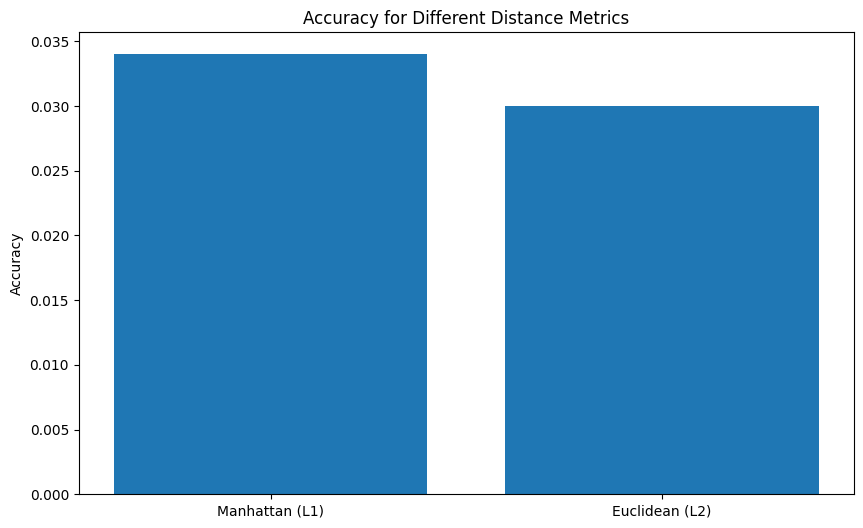

In [21]:
correct_manhattan = sum(1 for i in range(200) if knn_manhattan.predict([X_test[i]])[0] == y_test[i])
correct_euclidean = sum(1 for i in range(200) if knn_euclidean.predict([X_test[i]])[0] == y_test[i])

accuracy_manhattan = correct_manhattan / 500
accuracy_euclidean = correct_euclidean / 500

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(['Manhattan (L1)', 'Euclidean (L2)'], [accuracy_manhattan, accuracy_euclidean])
plt.title('Accuracy for Different Distance Metrics')
plt.ylabel('Accuracy')
plt.show()
